# MIRI MRS OTIS ASPA source spectrum  
In this notebook we examine the spectrum of the ASPA source observed during OTIS testing. An investigation of the spectrum change between pointings is also carried out.  
  
Notebook creation date: 23nd of February 2018  
Author: Ioannis Argyriou (Institute of Astronomy, KUL)  
Email: ioannis.argyriou@kuleuven.be

## > Import modules

In [19]:
from distortionMaps import d2cMapping
import mrs_aux as maux
import funcs

import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit
import scipy.interpolate as scp_interpolate
from matplotlib import pyplot as plt
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

frame = (18,6) # figsize parameter dimensions for plotting

## > Get data

In [3]:
# Define paths to data
workDir = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir  = workDir+'cdp_data/'
data_path = workDir+'OTIS_data/'

# Get data
#>Int Cal Source OTIS data, band 1A/2A
otis_intcalsource_scifile = data_path+'MRS_RAD_11_CPT/MIRV00331001001P0000000002103_1_495_SE_2017-08-25T19h09m24_LVL2.fits'
otis_intcalsource_bkgfile = ''

#>ASPA source, Pass-and-a-half test
sci_imgs_v03 = {"1A":data_path +'MIRM32313-SS-V03-7249024654_1_495_SE_2017-09-06T02h54m21_LVL2.fits',
            "1B":data_path +'MIRM32313-MM-V03-7249025513_1_495_SE_2017-09-06T03h03m01_LVL2.fits', 
            "1C":data_path +'MIRM32313-LL-V03-7249030323_1_495_SE_2017-09-06T03h08m31_LVL2.fits', 
            "2A":data_path +'MIRM32313-SS-V03-7249024654_1_495_SE_2017-09-06T02h54m21_LVL2.fits', 
            "2B":data_path +'MIRM32313-MM-V03-7249025513_1_495_SE_2017-09-06T03h03m01_LVL2.fits', 
            "2C":data_path +'MIRM32313-LL-V03-7249030323_1_495_SE_2017-09-06T03h08m31_LVL2.fits', 
            "3A":data_path +'MIRM32313-SS-V03-7249024654_1_494_SE_2017-09-06T02h54m21_LVL2.fits', 
            "3B":data_path +'MIRM32313-MM-V03-7249025513_1_494_SE_2017-09-06T03h03m01_LVL2.fits', 
            "3C":data_path +'MIRM32313-LL-V03-7249030323_1_494_SE_2017-09-06T03h08m31_LVL2.fits', 
            "4A":data_path +'MIRM32313-SS-V03-7249024654_1_494_SE_2017-09-06T02h54m21_LVL2.fits', 
            "4B":data_path +'MIRM32313-MM-V03-7249025513_1_494_SE_2017-09-06T03h03m01_LVL2.fits', 
            "4C":data_path +'MIRM32313-LL-V03-7249030323_1_494_SE_2017-09-06T03h08m31_LVL2.fits'}

bkg_imgs_v03 = {"1A":data_path +'MIRM32313-SS-V03B-7249024337_1_495_SE_2017-09-06T02h49m41_LVL2.fits', 
            "1B":data_path +'MIRM32313-MM-V03B-7249025018_1_495_SE_2017-09-06T02h57m31_LVL2.fits', 
            "1C":data_path +'MIRM32313-LL-V03B-7249025837_1_495_SE_2017-09-06T03h05m21_LVL2.fits', 
            "2A":data_path +'MIRM32313-SS-V03B-7249024337_1_495_SE_2017-09-06T02h49m41_LVL2.fits', 
            "2B":data_path +'MIRM32313-MM-V03B-7249025018_1_495_SE_2017-09-06T02h57m31_LVL2.fits', 
            "2C":data_path +'MIRM32313-LL-V03B-7249025837_1_495_SE_2017-09-06T03h05m21_LVL2.fits', 
            "3A":data_path +'MIRM32313-SS-V03B-7249024337_1_494_SE_2017-09-06T02h49m41_LVL2.fits', 
            "3B":data_path +'MIRM32313-MM-V03B-7249025018_1_494_SE_2017-09-06T02h57m31_LVL2.fits', 
            "3C":data_path +'MIRM32313-LL-V03B-7249025837_1_494_SE_2017-09-06T03h05m21_LVL2.fits', 
            "4A":data_path +'MIRM32313-SS-V03B-7249024337_1_494_SE_2017-09-06T02h49m41_LVL2.fits', 
            "4B":data_path +'MIRM32313-MM-V03B-7249025018_1_494_SE_2017-09-06T02h57m31_LVL2.fits', 
            "4C":data_path +'MIRM32313-LL-V03B-7249025837_1_494_SE_2017-09-06T03h05m21_LVL2.fits'}

sci_imgs_v05 = {"1A":data_path +'MIRM32313-SS-V05-7249031538_1_495_SE_2017-09-06T03h23m41_LVL2.fits',
            "1B":data_path +'MIRM32313-MM-V05-7249032353_1_495_SE_2017-09-06T03h31m21_LVL2.fits', 
            "1C":data_path +'MIRM32313-LL-V05-7249033205_1_495_SE_2017-09-06T03h37m41_LVL2.fits', 
            "2A":data_path +'MIRM32313-SS-V05-7249031538_1_495_SE_2017-09-06T03h23m41_LVL2.fits', 
            "2B":data_path +'MIRM32313-MM-V05-7249032353_1_495_SE_2017-09-06T03h31m21_LVL2.fits', 
            "2C":data_path +'MIRM32313-LL-V05-7249033205_1_495_SE_2017-09-06T03h37m41_LVL2.fits', 
            "3A":data_path +'MIRM32313-SS-V05-7249031538_1_494_SE_2017-09-06T03h23m41_LVL2.fits', 
            "3B":data_path +'MIRM32313-MM-V05-7249032353_1_494_SE_2017-09-06T03h31m21_LVL2.fits', 
            "3C":data_path +'MIRM32313-LL-V05-7249033205_1_494_SE_2017-09-06T03h37m41_LVL2.fits', 
            "4A":data_path +'MIRM32313-SS-V05-7249031538_1_494_SE_2017-09-06T03h23m41_LVL2.fits', 
            "4B":data_path +'MIRM32313-MM-V05-7249032353_1_494_SE_2017-09-06T03h31m21_LVL2.fits', 
            "4C":data_path +'MIRM32313-LL-V05-7249033205_1_494_SE_2017-09-06T03h37m41_LVL2.fits'}

bkg_imgs_v05 = {"1A":data_path +'MIRM32313-SS-V05B-7249031039_1_495_SE_2017-09-06T03h18m01_LVL2.fits', 
            "1B":data_path +'MIRM32313-MM-V05B-7249031906_1_495_SE_2017-09-06T03h26m01_LVL2.fits', 
            "1C":data_path +'MIRM32313-LL-V05B-7249032716_1_495_SE_2017-09-06T03h34m51_LVL2.fits', 
            "2A":data_path +'MIRM32313-SS-V05B-7249031039_1_495_SE_2017-09-06T03h18m01_LVL2.fits', 
            "2B":data_path +'MIRM32313-MM-V05B-7249031906_1_495_SE_2017-09-06T03h26m01_LVL2.fits', 
            "2C":data_path +'MIRM32313-LL-V05B-7249032716_1_495_SE_2017-09-06T03h34m51_LVL2.fits', 
            "3A":data_path +'MIRM32313-SS-V05B-7249031039_1_494_SE_2017-09-06T03h18m01_LVL2.fits', 
            "3B":data_path +'MIRM32313-MM-V05B-7249031906_1_494_SE_2017-09-06T03h26m01_LVL2.fits', 
            "3C":data_path +'MIRM32313-LL-V05B-7249032716_1_494_SE_2017-09-06T03h34m51_LVL2.fits', 
            "4A":data_path +'MIRM32313-SS-V05B-7249031039_1_494_SE_2017-09-06T03h18m01_LVL2.fits', 
            "4B":data_path +'MIRM32313-MM-V05B-7249031906_1_494_SE_2017-09-06T03h26m01_LVL2.fits', 
            "4C":data_path +'MIRM32313-LL-V05B-7249032716_1_494_SE_2017-09-06T03h34m51_LVL2.fits'}

## > Transform data

In [12]:
band     = '2A'                    # this is the spectral band (side of the slope image) to be analyzed
d2cMaps  = d2cMapping(band,cdpDir) # here, d2c stands for detector to cube transformation, from x,y integer pixel coordinates, to alpha, beta, and wavelength coordinates
sliceMap = d2cMaps['sliceMap']     # map with slice IDs
det_dims = (1024,1032)             # pixel dimensions of the detector

fringe_file,photom_file,psf_file,resol_file = funcs.get_cdps(cdpDir=cdpDir,band=band)

fringe_img     = fits.open(fringe_file)[1].data        # [unitless]
photom_img     = fits.open(photom_file)[1].data        # [DN/s * pixel/mJy]
pixsiz_img     = fits.open(photom_file)[5].data        # [arcsec^2/pix]
psffits        = fits.open(psf_file)                   # [unitless]
specres_table  = fits.open(resol_file)[1].data         # [unitless]

In [5]:
v03_sciimg = fits.open(sci_imgs_v03[band])[0].data[0,:,:] - fits.open(bkg_imgs_v03[band])[0].data[0,:,:]
v05_sciimg = fits.open(sci_imgs_v05[band])[0].data[0,:,:] - fits.open(bkg_imgs_v05[band])[0].data[0,:,:]

# odd-even row signal correction
v03_sciimg = funcs.OddEvenRowSignalCorrection(v03_sciimg)
v05_sciimg = funcs.OddEvenRowSignalCorrection(v05_sciimg)

# straylight correction
v03_sciimg = funcs.straylightCorrection(v03_sciimg,sliceMap)
v05_sciimg = funcs.straylightCorrection(v05_sciimg,sliceMap)

## > Modeling

In [33]:
# experiment here
spec_grid = funcs.spectral_gridding(band=band,d2cMaps=d2cMaps,specres_table=specres_table)
v03_source_center_slice,v03_sign_amps,v03_alpha_centers,v03_alpha_sigmas,v03_bkg_amps = funcs.point_source_along_slice_centroiding(band=band,sci_img=v03_sciimg,d2cMaps=d2cMaps,spec_grid=spec_grid)
v05_source_center_slice,v05_sign_amps,v05_alpha_centers,v05_alpha_sigmas,v05_bkg_amps = funcs.point_source_along_slice_centroiding(band=band,sci_img=v05_sciimg,d2cMaps=d2cMaps,spec_grid=spec_grid)

v03_source_center_slice,v03_sign_amps2,v03_alpha_centers,v03_alpha_sigmas,v03_bkg_amps = funcs.point_source_along_slice_centroiding(band=band,sci_img=v03_sciimg,d2cMaps=d2cMaps,spec_grid=spec_grid,offset_slice=-2)
v05_source_center_slice,v05_sign_amps2,v05_alpha_centers,v05_alpha_sigmas,v05_bkg_amps = funcs.point_source_along_slice_centroiding(band=band,sci_img=v05_sciimg,d2cMaps=d2cMaps,spec_grid=spec_grid,offset_slice=-2)

Slice 13 has the largest summed flux
Slice 6 has the largest summed flux
Slice 11 has the largest summed flux
Slice 4 has the largest summed flux


In [34]:
v03_sign_amps_noNaN,v03_sign_amps_peaks,v03_sign_amps_profile = funcs.norm_fringe(v03_sign_amps,thres=0,min_dist=10,k=3,ext=3)
v05_sign_amps_noNaN,v05_sign_amps_peaks,v05_sign_amps_profile = funcs.norm_fringe(v05_sign_amps,thres=0,min_dist=10,k=3,ext=3)

v03_sign_amps2_noNaN,v03_sign_amps_peaks2,v03_sign_amps_profile2 = funcs.norm_fringe(v03_sign_amps2,thres=0,min_dist=10,k=3,ext=3)
v05_sign_amps2_noNaN,v05_sign_amps_peaks2,v05_sign_amps_profile2 = funcs.norm_fringe(v05_sign_amps2,thres=0,min_dist=10,k=3,ext=3)

## > Visualization

<IPython.core.display.Javascript object>


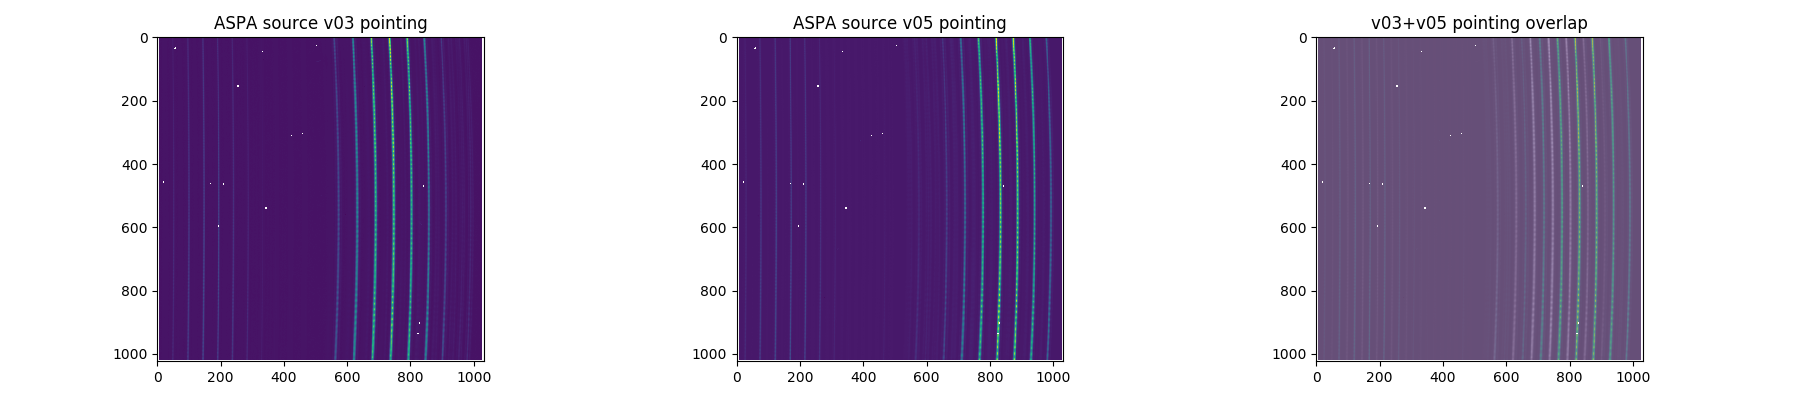

<IPython.core.display.Javascript object>


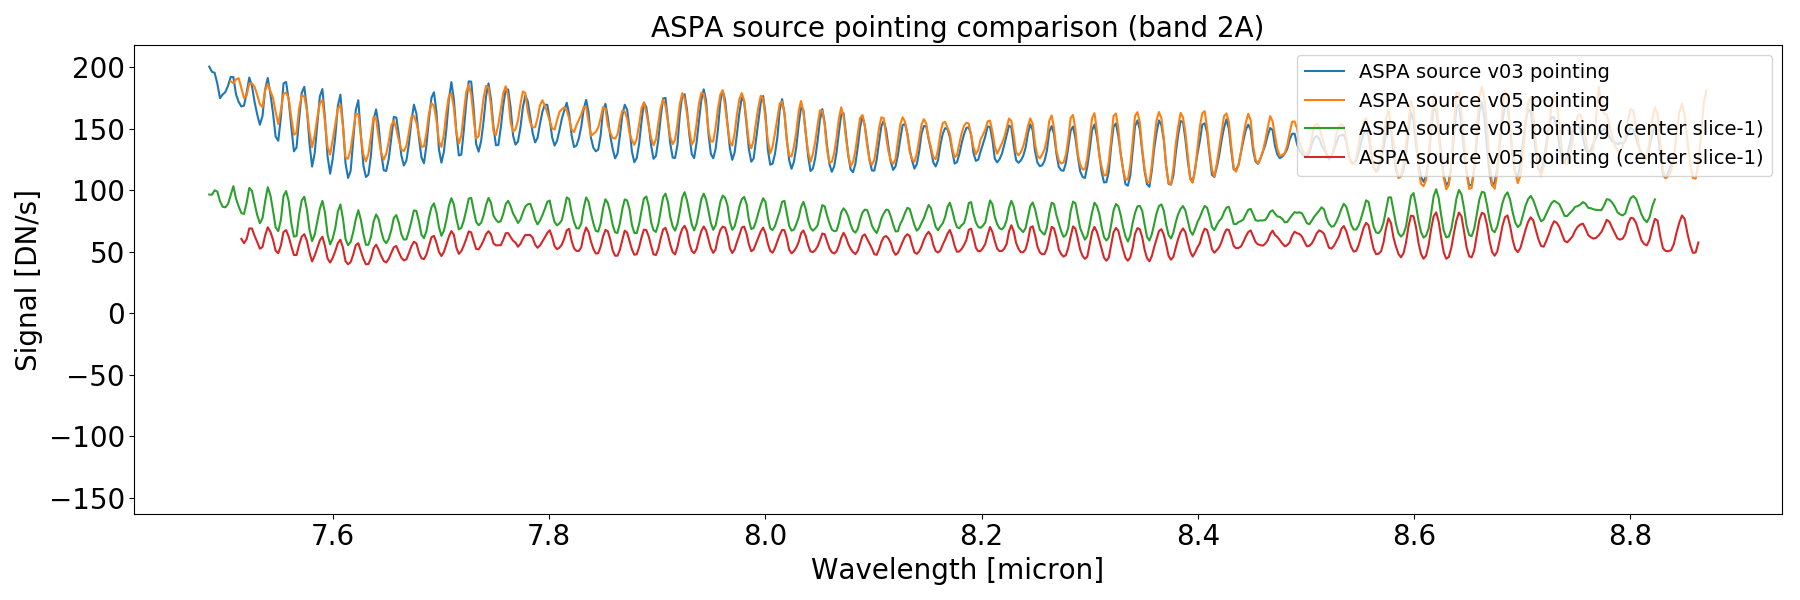

In [37]:
# make plots
fig,axs = plt.subplots(1,3,figsize=(18,4))
axs[0].imshow(v03_sciimg)
axs[0].set_title('ASPA source v03 pointing')
axs[1].imshow(v05_sciimg)
axs[1].set_title('ASPA source v05 pointing')
axs[2].imshow(v03_sciimg,'gray',alpha=0.5)
axs[2].imshow(v05_sciimg,'viridis',alpha=0.5)
axs[2].set_title('v03+v05 pointing overlap')
plt.tight_layout()

plt.figure(figsize=frame)
plt.plot(spec_grid[0],v03_sign_amps,label='ASPA source v03 pointing')
plt.plot(spec_grid[0],v05_sign_amps,label='ASPA source v05 pointing')
plt.plot(spec_grid[0],v03_sign_amps2,label='ASPA source v03 pointing (center slice-1)')
plt.plot(spec_grid[0],v05_sign_amps2,label='ASPA source v05 pointing (center slice-1)')
plt.xlabel('Wavelength [micron]',fontsize=20)
plt.ylabel('Signal [DN/s]',fontsize=20)
plt.title('ASPA source pointing comparison (band {})'.format(band),fontsize=20)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()

<IPython.core.display.Javascript object>


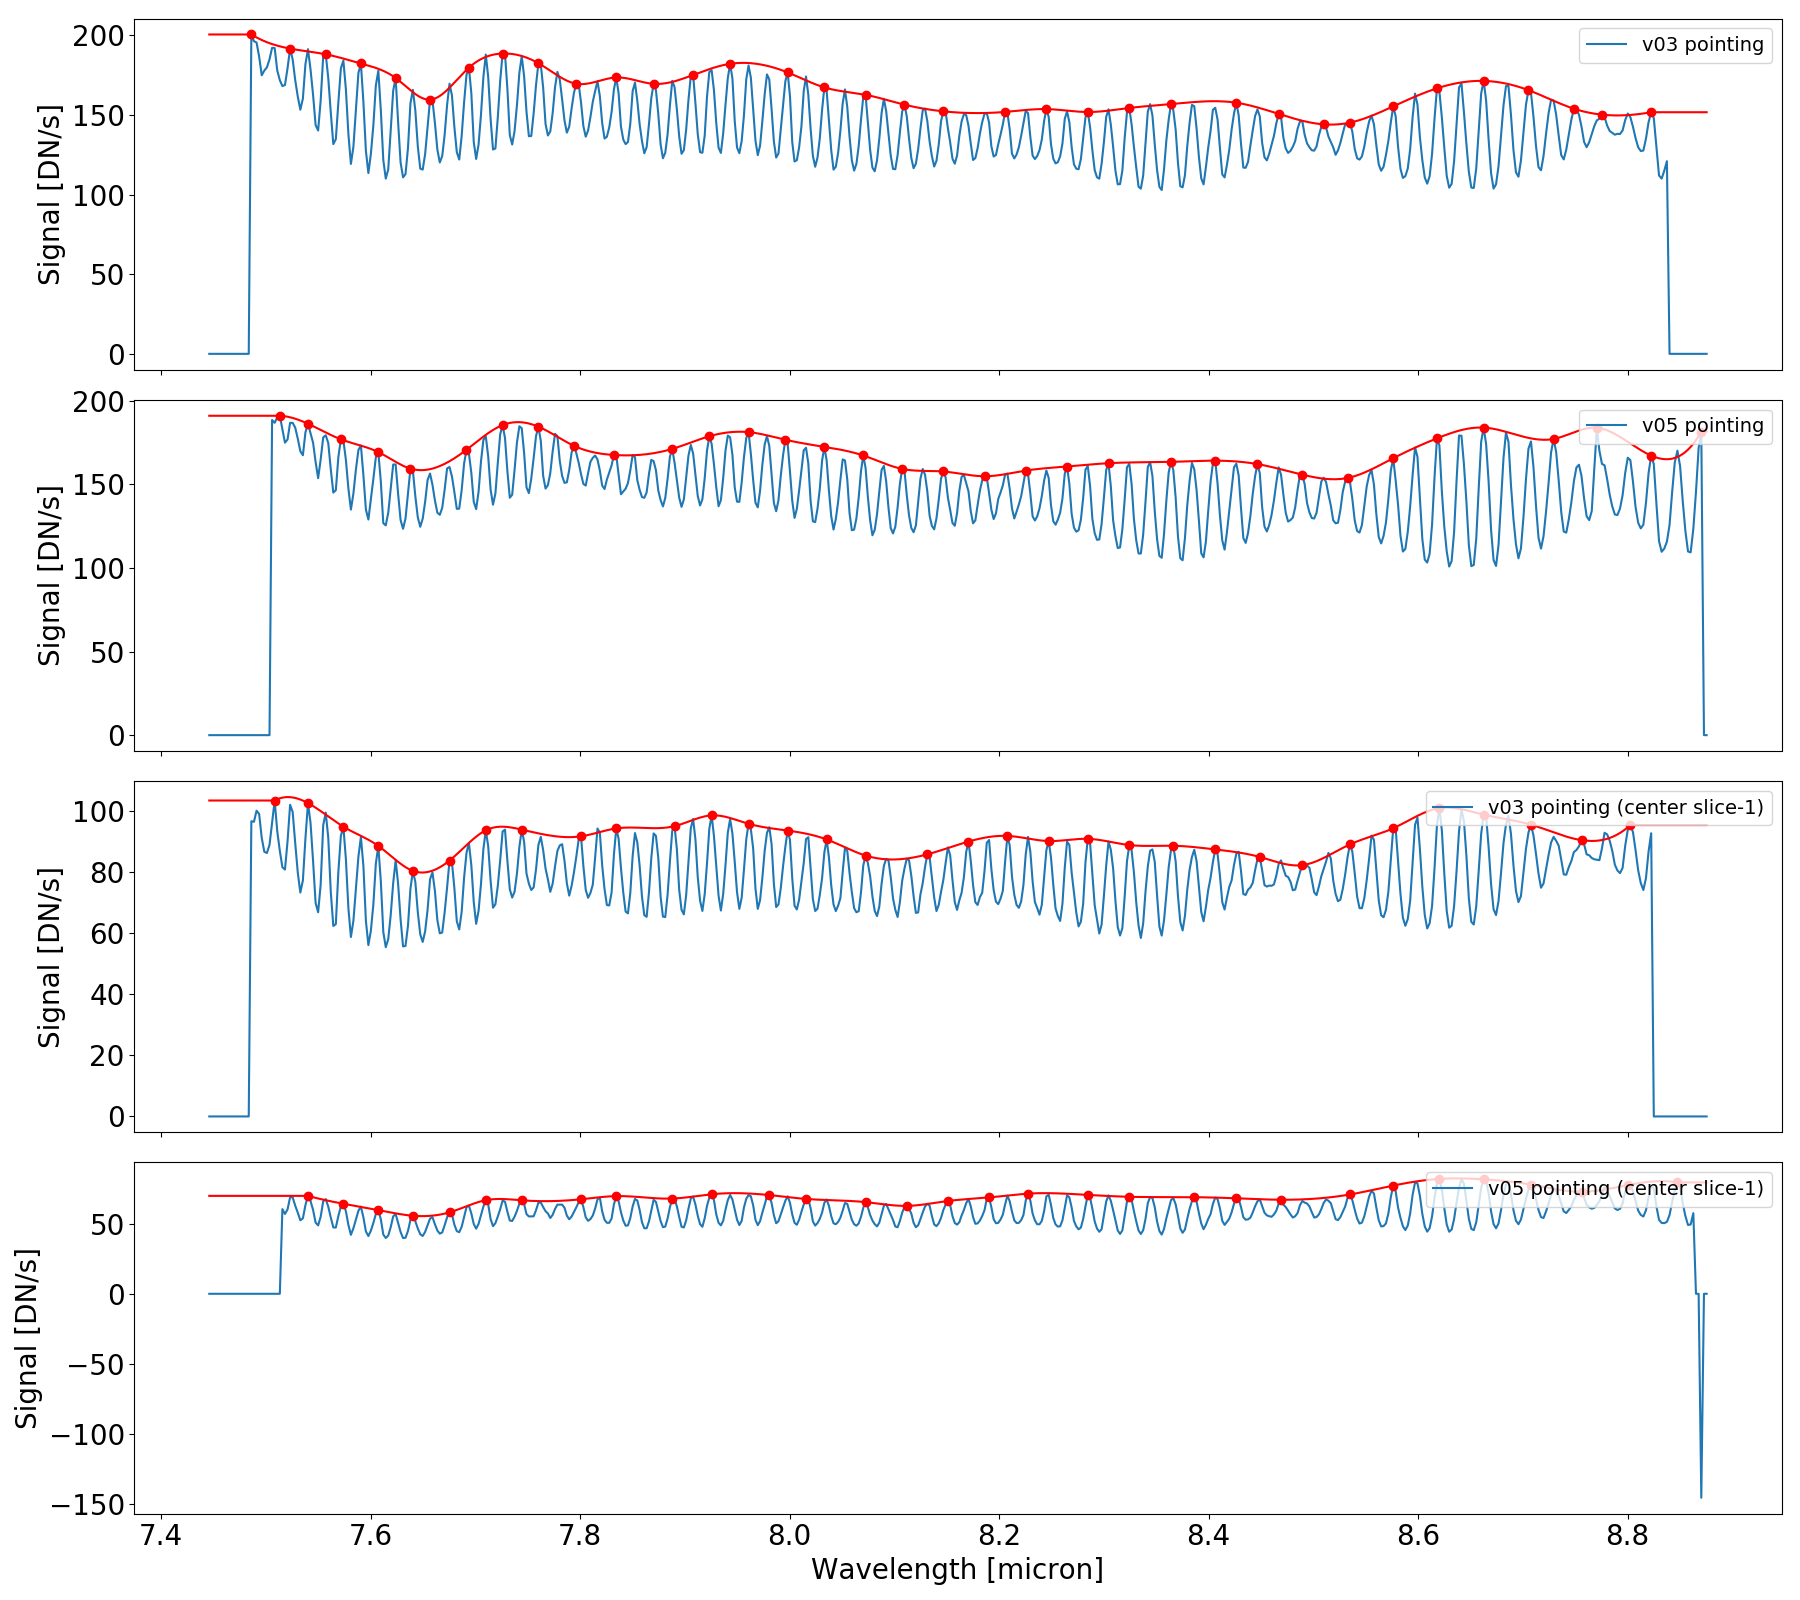

<IPython.core.display.Javascript object>


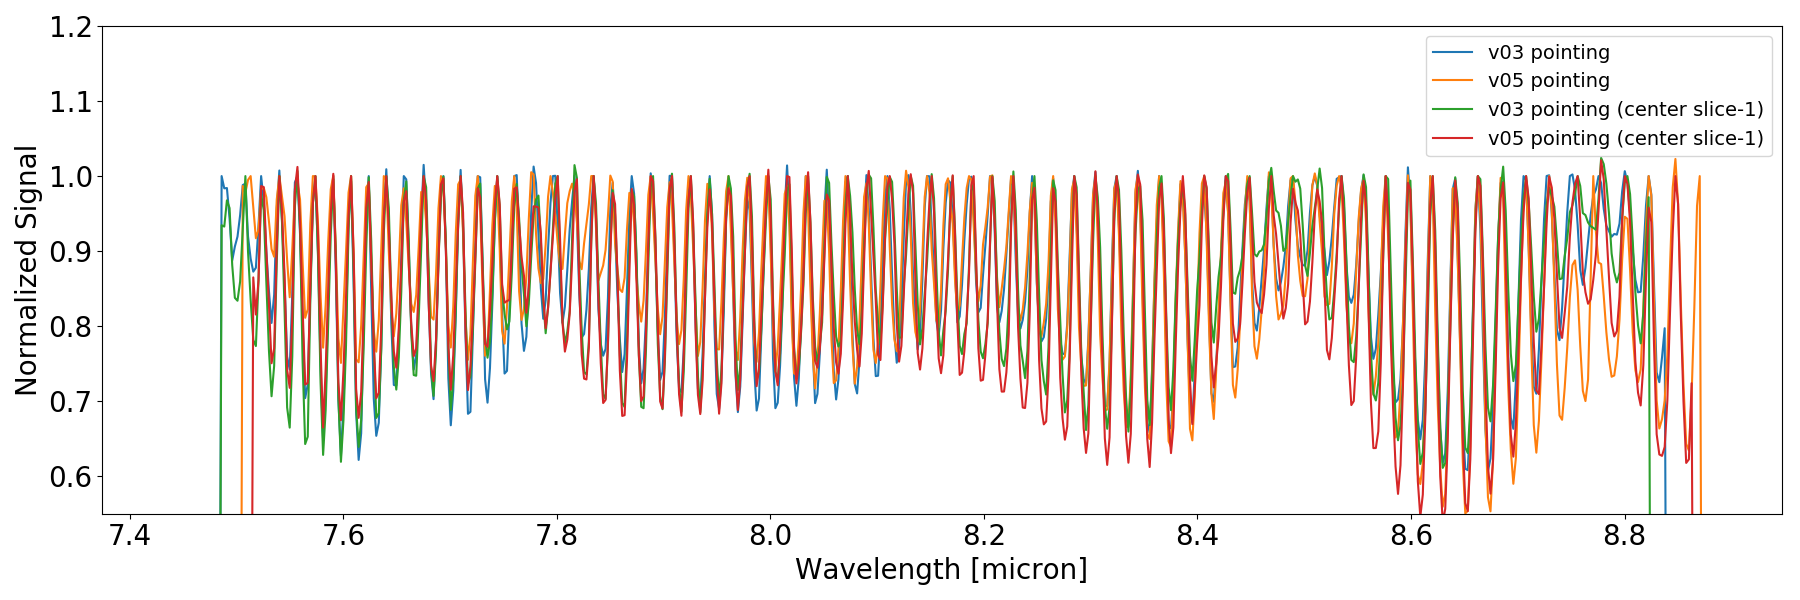

In [36]:
plt.close('all')
fig,axs = plt.subplots(4,1,figsize=(18,16),sharex=True)
axs[0].plot(spec_grid[0],v03_sign_amps_noNaN,label='v03 pointing')
axs[0].plot(spec_grid[0][v03_sign_amps_peaks],v03_sign_amps_noNaN[v03_sign_amps_peaks],'ro')
axs[0].plot(spec_grid[0],v03_sign_amps_profile,'r')
axs[0].set_ylabel('Signal [DN/s]',fontsize=20)
axs[0].legend(loc='upper right',fontsize=14)
axs[0].tick_params(axis='both',labelsize=20)
axs[1].plot(spec_grid[0],v05_sign_amps_noNaN,label='v05 pointing')
axs[1].plot(spec_grid[0][v05_sign_amps_peaks],v05_sign_amps_noNaN[v05_sign_amps_peaks],'ro')
axs[1].plot(spec_grid[0],v05_sign_amps_profile,'r')
axs[1].set_ylabel('Signal [DN/s]',fontsize=20)
axs[1].legend(loc='upper right',fontsize=14)
axs[1].tick_params(axis='both',labelsize=20)
axs[2].plot(spec_grid[0],v03_sign_amps2_noNaN,label='v03 pointing (center slice-1)')
axs[2].plot(spec_grid[0][v03_sign_amps_peaks2],v03_sign_amps2_noNaN[v03_sign_amps_peaks2],'ro')
axs[2].plot(spec_grid[0],v03_sign_amps_profile2,'r')
axs[2].set_ylabel('Signal [DN/s]',fontsize=20)
axs[2].legend(loc='upper right',fontsize=14)
axs[2].tick_params(axis='both',labelsize=20)
axs[3].plot(spec_grid[0],v05_sign_amps2_noNaN,label='v05 pointing (center slice-1)')
axs[3].plot(spec_grid[0][v05_sign_amps_peaks2],v05_sign_amps2_noNaN[v05_sign_amps_peaks2],'ro')
axs[3].plot(spec_grid[0],v05_sign_amps_profile2,'r')
axs[3].set_xlabel('Wavelength [micron]',fontsize=20)
axs[3].set_ylabel('Signal [DN/s]',fontsize=20)
axs[3].legend(loc='upper right',fontsize=14)
axs[3].tick_params(axis='both',labelsize=20)
plt.tight_layout()

plt.figure(figsize=frame)
plt.plot(spec_grid[0],v03_sign_amps_noNaN/v03_sign_amps_profile,label='v03 pointing')
plt.plot(spec_grid[0],v05_sign_amps_noNaN/v05_sign_amps_profile,label='v05 pointing')
plt.plot(spec_grid[0],v03_sign_amps2_noNaN/v03_sign_amps_profile2,label='v03 pointing (center slice-1)')
plt.plot(spec_grid[0],v05_sign_amps2_noNaN/v05_sign_amps_profile2,label='v05 pointing (center slice-1)')
plt.xlabel('Wavelength [micron]',fontsize=20)
plt.ylabel('Normalized Signal',fontsize=20)
plt.ylim(0.55,1.2)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(axis='both',labelsize=20)
plt.tight_layout()